This notebook demonstrates the result of the first round of data collection, collected in the San Francisco Bay Area by @shankari. The round had several shortcomings, some of which were addressed during the data collection and some of which were fixed before starting the second round of data collection.

## Import all the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# For plots
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
# For maps
import branca.element as bre

In [5]:
# For displaying dates
import arrow

## Load and validate data

The first issue to note is that we actually have two specs here. The first spec is the checked in `evaluation.spec.sample`, which defines calibration for both stationary and moving instances, and some evaluation trips. However, while starting with the calibration, we noticed some inconsistencies between the power curves. So in order to be more consistent, I defined a second, calibration-only spec `examples/calibration.only.json`, which essentially repeats the calibration experiments multiple times.

After that, I returned to the first set of experiments for the moving calibration and the evaluation.

In [6]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sdmco1 = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "sfba_moving_calibration_only_1")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1563176205}
response = <Response [200]>
Found 3 entries
After iterating over 3 entries, entry found
Found spec = Moving calibration only #1 to test fixes to calibration UI
Evaluation ran from 2019-07-10T17:00:00-07:00 -> 2019-07-12T17:00:00-07:00


In [8]:
pvmco1 = eipv.PhoneView(sdmco1)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1562803200, 'end_time': 1562976000}
response = <Response [200]>
Found 3 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1562803200, 'end_time': 1562976000}
response = <Response [200]>
Found 3 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1562803200, 'end_time': 1562976000}
response = <Response [200]>
Found 3 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/eva

About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1562971865.32, 'end_time': 1562976000}
response = <Response [200]>
Found 8 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1562952273, 'end_time': 1562958092}
response = <Response [200]>
Found 2 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1562971943.329, 'end_time': 1562976000}
response = <Response [200]>
Found 8 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/battery'], 'start_time': 1562952273, 'end_time': 1562958092}
response = <Response [200]>
Found 4 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/battery'], 'start_time': 1562971948.14, 'end_time': 1562976000}
response = <Response [200]>
Found 10 entries
About to retrieve messag

response = <Response [200]>
Found 1047 entries
Retrieved 1047 entries with timestamps [1562972048.109, 1562972068.995, 1562972070.341, 1562972077.099, 1562972087.769, 1562972094.885, 1562972095.172, 1562972103.372, 1562972109.83, 1562972115.826]...
About to retrieve data for ucb-sdb-android-4 from 1562975997.539 -> 1562976000
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/location'], 'start_time': 1562975997.539, 'end_time': 1562976000}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1562975997.539]...
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1562952273 -> 1562958092
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1562952273, 'end_time': 1562958092}
response = <Response [200]>
Found 2464 entries
Retrieved 2464 entries with timestamps [1562952272.9984365, 1562952273.9984138, 1562952274.9983912, 1562952275.9983687, 156

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1562958085.837]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1562971865.32 -> 1562976000
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1562971865.32, 'end_time': 1562976000}
response = <Response [200]>
Found 336 entries
Retrieved 336 entries with timestamps [1562971883.294, 1562971911.106, 1562971937.677, 1562971937.713, 1562971944.481, 1562971950.504, 1562971958.498, 1562971962.065, 1562971973.932, 1562971974.334]...
About to retrieve data for ucb-sdb-android-1 from 1562975989.945 -> 1562976000
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1562975989.945, 'end_time': 1562976000}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1562975989.945]...
motion acti

response = <Response [200]>
Found 249 entries
Retrieved 249 entries with timestamps [1562952295.8126273, 1562952300.80101, 1562952361.5806077, 1562952363.150292, 1562952368.14064, 1562952418.3147764, 1562952430.4842577, 1562952441.0817692, 1562952451.9926834, 1562952460.4176884]...
About to retrieve data for ucb-sdb-ios-2 from 1562957937.2363017 -> 1562958092
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1562957937.2363017, 'end_time': 1562958092}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1562957937.2363017]...
About to retrieve data for ucb-sdb-ios-2 from 1562972053.839 -> 1562976000
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1562972053.839, 'end_time': 1562976000}
response = <Response [200]>
Found 122 entries
Retrieved 122 entries with timestamps [1562972053.9192913, 1562972063.919292, 1562972088.919291

### Issue #1: Multiple and missing transitions

While exploring the data after the collection was done, there were still inconsistencies in the transitions pushed to the server - there were a bunch of duplicate transitions, and two of the phones were missing start transitions for the second trip.

In [9]:
# Commented out because this fails
# pvt3.validate()

In [10]:
# pvmco1.validate()

In [11]:
evmco1 = eiev.EvaluationView()
evmco1.from_view_single_run(pvmco1, "")

Processing data for android phones
Processing data for ios phones


## Now for the results (calibration, phone view)!

### Battery drain over time (moving calibration)

Again, the moving calibration runs were not very useful in terms of battery drain, since there were too few points to be useful. We actually have more points on android, but we have almost nothing for the iOS medium accuracy runs.

Part of this is inherent in the definition of moving calibration, since it is unlikely that we will move for 10-15 hours at a time to collect the kind of data we have in the stationary case. And if our trip lasts for an hour, but we only read the battery level once an hour, we will end up with close to no data.

But with some native code changes, I think we can do better wrt at least recording the battery reading at the trip start and end.

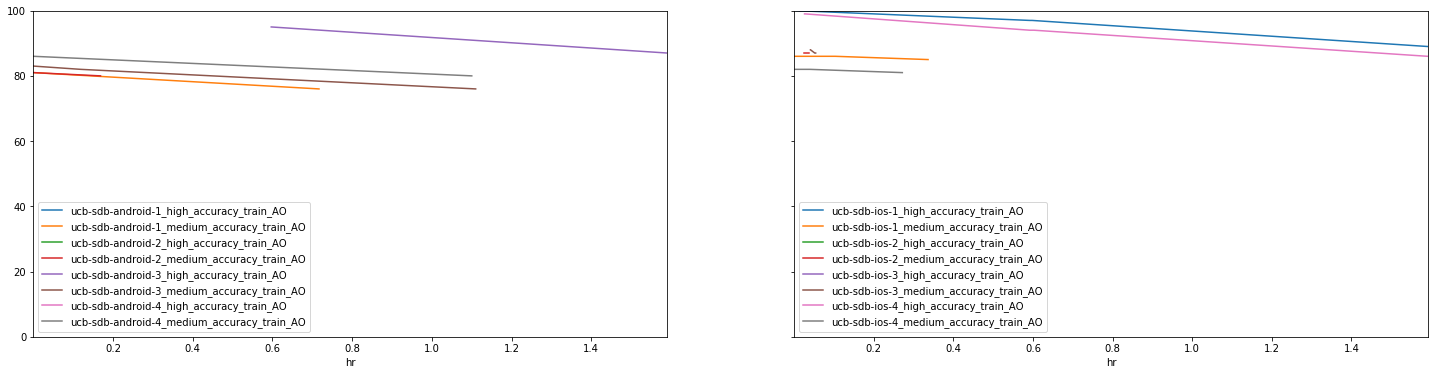

In [12]:
(ifig, [android_ax, ios_ax]) = plt.subplots(ncols=2, nrows=1, figsize=(25,6))

ezpv.plot_all_power_drain(ios_ax, pvmco1.map()["ios"], "calibration", "AO")
# ios_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ezpv.plot_all_power_drain(android_ax, pvmco1.map()["android"], "calibration", "AO")
# android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

### Checking counts (moving)

All the same observations from the previous run hold.

- on iOS: significant number of points
- on iOS: medium accuracy is consistently lower than high accuracy
- on android: medium accuracy = significant number of points, but lower

On android, medium accuracy sensing now generates ~ 0.5 * the number of points with high accuracy, but the medium accuracy numbers are consistently lower than the high accuracy.

In [13]:
count_df = ezpv.get_count_df(pvmco1); count_df.filter(like="AO")

Processing data for android phones
Processing data for ios phones


,high_accuracy_train_AO,medium_accuracy_train_AO
android_ucb-sdb-android-1,3732,1175
android_ucb-sdb-android-2,2865,1294
android_ucb-sdb-android-3,3963,1586
android_ucb-sdb-android-4,3835,1047
ios_ucb-sdb-ios-1,2464,276
ios_ucb-sdb-ios-2,2465,145
ios_ucb-sdb-ios-3,2640,237
ios_ucb-sdb-ios-4,2183,283


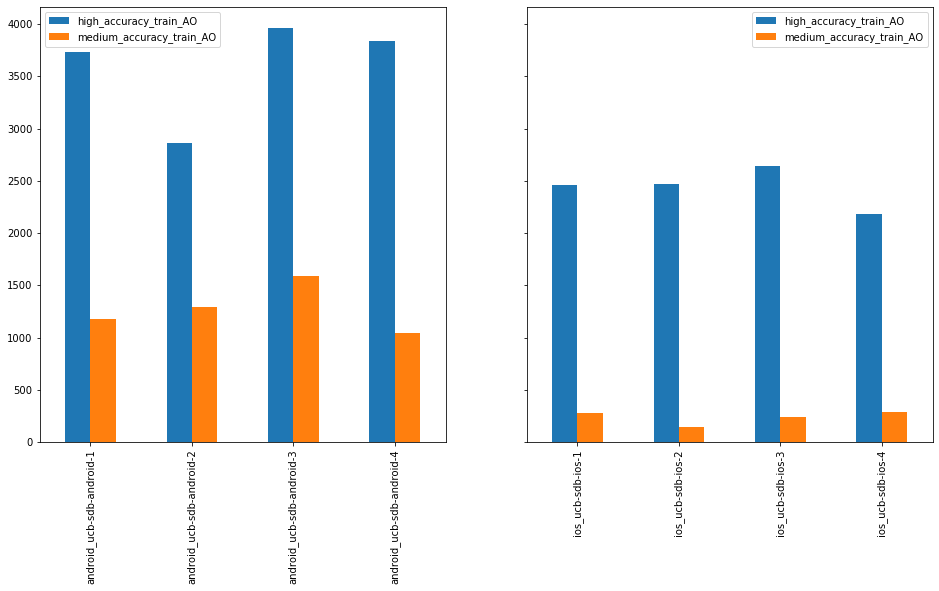

In [14]:
(ifig, ax) = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)
count_df.filter(like="AO").filter(like="android", axis=0).plot(ax=ax[0],kind="bar")
count_df.filter(like="AO").filter(like="ios", axis=0).plot(ax=ax[1],kind="bar")

### Checking densities (moving)

As expected, when moving, while the densities do vary, they do not show the kind of spiky behavior that we see while stationary. Instead, we get points pretty much throughout the travel time.

1982
1320


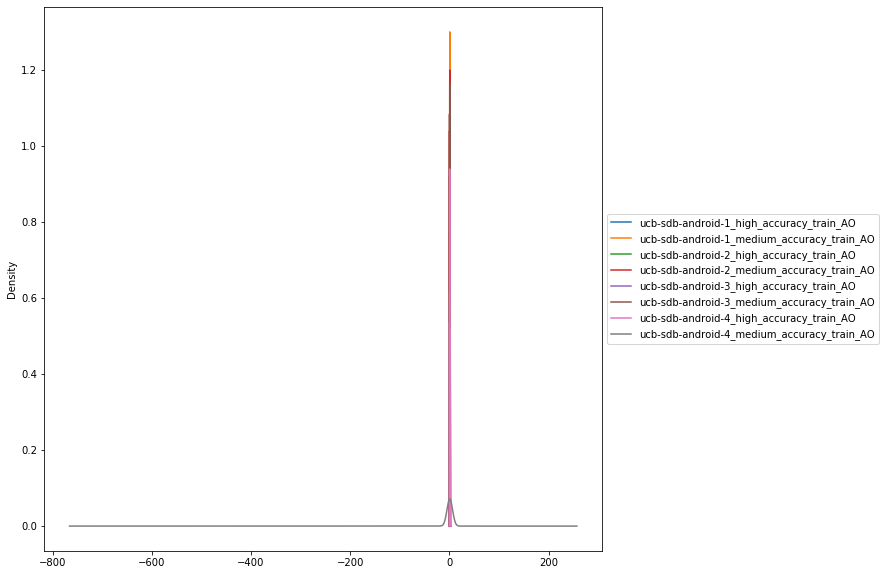

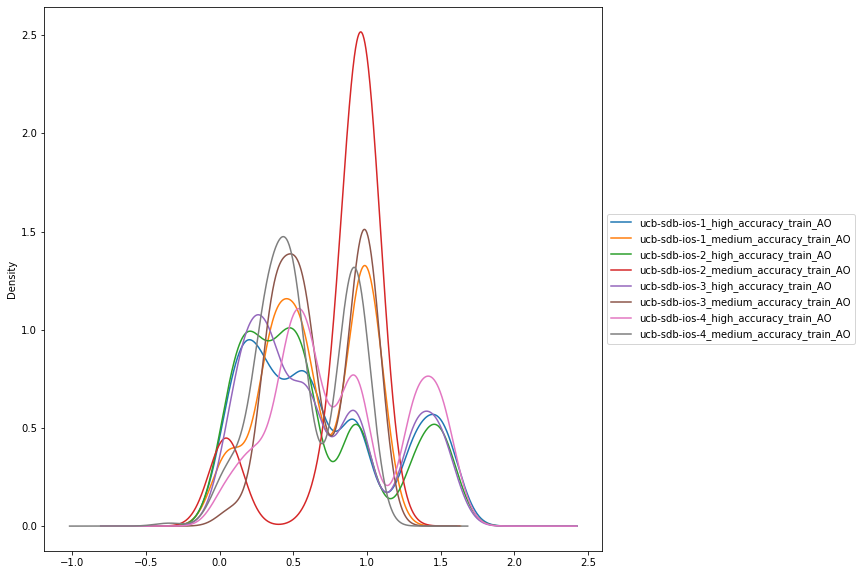

In [15]:
android_density_df = ezpv.get_location_density_df(pvmco1.map()["android"])
nRows = ezpv.get_row_count(len(android_density_df), 2)
print(nRows)
android_ax = android_density_df.filter(like="AO").plot(kind='density', subplots=False, layout=(nRows, 2), figsize=(10,10), sharex=True, sharey=True)
android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

ios_density_df = ezpv.get_location_density_df(pvmco1.map()["ios"])
nRows = ezpv.get_row_count(len(ios_density_df), 2)
print(nRows)
ios_ax = ios_density_df.filter(like="AO").plot(kind='density', subplots=False, layout=(nRows, 2), figsize=(10,10), sharex=True, sharey=True)
ios_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

### Anomaly #1: android spike

The android density data seems to be really spiky. Mainly due to `ucb-sdb-android-4_medium_accuracy_train_AO`.
Let'see what the outlier entries are. It looks like there are a few points that started 510 minutes before the actual start of the trip (i.e. from Jun 21 instead of Jul 12). One of them has a low accuracy (row 164), but the other has high accuracy (12 m radius).

In [16]:
spiky_range = pvmco1.map()["android"]["ucb-sdb-android-4"]["calibration_ranges"][1]
spiky_range["location_df"][spiky_range["location_df"].hr < 0]

,accuracy,altitude,bearing,elapsedRealtimeNanos,filter,fmt_time,latitude,longitude,sensed_speed,ts,hr
18,50.0,-34.0,0.0,3171091252000000,time,"Jul 12, 2019 10:11:23 AM",37.406768,-122.105734,0,1.562951e+09,-5.710122
74,12.0,20.0,358.9,3171415752000000,time,"Jun 21, 2019 9:40:40 AM",37.847712,-122.271118,0,1.561135e+09,-510.222067
164,198.0,51.0,353.9,3171939353000000,time,"Jun 21, 2019 9:40:36 AM",37.847028,-122.271069,0,1.561135e+09,-510.223178


Let's see if we can check the rows around 74. From both the raw data and the map, there is clearly an anomaly here. If we look at the raw entries, we clearly see that the `write_ts` was still on Jul 12, which means that we have an anomaly of several weeks between the time that the point was generated and the time that it was delivered to us.

Although looking at the ground truth of the trip, the anomalous point is between Ashby and MacArthur BART so pretty close to the BART line. While points 75+ are in El Cerrito, which was never on the actual trajectory

In [17]:
spiky_range["location_df"].iloc[72:77]

,accuracy,altitude,bearing,elapsedRealtimeNanos,filter,fmt_time,latitude,longitude,sensed_speed,ts,hr
72,129.931,0.0,0.0,3171396651000000,time,"Jul 12, 2019 4:01:21 PM",37.874293,-122.283460,0,1.562972e+09,0.122885
73,129.931,0.0,0.0,3171402659000000,time,"Jul 12, 2019 4:01:27 PM",37.874293,-122.283460,0,1.562972e+09,0.124554
74,12.000,20.0,358.9,3171415752000000,time,"Jun 21, 2019 9:40:40 AM",37.847712,-122.271118,0,1.561135e+09,-510.222067
75,1508.000,0.0,0.0,3171420940000000,time,"Jul 12, 2019 4:01:46 PM",37.893523,-122.286152,0,1.562973e+09,0.129632
76,1508.000,0.0,0.0,3171426785000000,time,"Jul 12, 2019 4:01:51 PM",37.893523,-122.286152,0,1.562973e+09,0.131255


In [18]:
[ezpv.print_entry(e, ["fmt_time"], ["fmt_time"], pvmco1.spec_details.eval_tz) for e in spiky_range["location_entries"][72:77]]

[[<Arrow [2019-07-12T16:01:21.889000-07:00]>,
  <Arrow [2019-07-12T16:01:21.826000-07:00]>],
 [<Arrow [2019-07-12T16:01:27.914000-07:00]>,
  <Arrow [2019-07-12T16:01:27.834000-07:00]>],
 [<Arrow [2019-07-12T16:01:41.042000-07:00]>,
  <Arrow [2019-06-21T09:40:40-07:00]>],
 [<Arrow [2019-07-12T16:01:46.953000-07:00]>,
  <Arrow [2019-07-12T16:01:46.115000-07:00]>],
 [<Arrow [2019-07-12T16:01:52.805000-07:00]>,
  <Arrow [2019-07-12T16:01:51.960000-07:00]>]]

In [19]:
ezpv.display_map_detail_from_df(spiky_range["location_df"].loc[72:77])

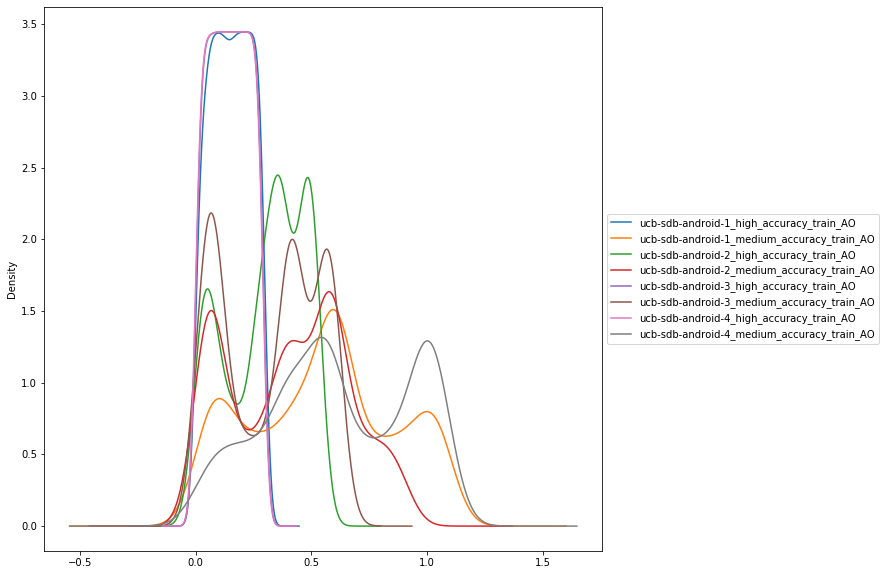

In [20]:
android_ax = android_density_df.filter(like="AO")[(android_density_df["ucb-sdb-android-4_medium_accuracy_train_AO"] > 0)].plot(kind='density', subplots=False, layout=(nRows, 2), figsize=(10,10), sharex=True, sharey=True)
android_ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

### Checking trajectories (moving)

As expected, these are more interesting than the stationary trajectories.

##### Medium accuracy trajectories have a lot of zig zags

the high accuracy trajectories look reasonably good, but the medium accuracy trajectories have significant zig zags

##### Medium accuracy tracking stops halfway through

The medium accuracy tracking stops at around 5pm, although, 

## Now for the results (calibration, evaluation view)!

### Trajectory matching

In the phone view, we were able to compare phone results against each other (e.g. `ucb-sdb-android-1` v/s `ucb-sdb-android-2` for the same run) by plotting them on the same graph. We need something similar for trajectories, so that we can get a better direct comparison against various configurations. To make this easier, we want to switch the view so that the calibration ranges are first grouped by the settings and then by the phone. Once we do that, we can compare trajectories from different phones for the same experiment in the same map.

##### Issue #1: No matching with ground truth

Zooming into the maps, we can see that even in the high accuracy case, there are mismatches between the trajectories. For example, the iOS high accuracy maps between South San Francisco and San Francisco, android medium accuracy maps between SF and the Easy Bay. Even if the trajectories match, they don't necessarily match with the ground truth, for example, the android high accuracy maps between 22nd street and 4th and King, iOS medium accuracy right after reaching Oakland. We should extend the spec to support this.

##### Issue #2: Medium accuracy tracking abruptly ends halfway through

The medium accuracy tracking on all 8 phones ends at around 5pm, although the trip actually ended at 6pm. I have forced synced and confirmed that `/usercache/put` is called, but we have no additional data. I am would have to look at the logs for further debugging, but it is pretty clear that we have no location points after Daly City.

In [21]:
map_list = ezev.get_map_list_single_run(evmco1, "calibration", "AO")
rows = ezpv.get_row_count(len(map_list), 2)
evaluation_maps = bre.Figure(ratio="{}%".format((rows/4) * 100))
for i, curr_map in enumerate(map_list):
    evaluation_maps.add_subplot(rows, 2, i+1).add_child(curr_map)

Processing data for android phones
0, ucb-sdb-android-1, dict_keys(['trip_id', 'start_ts', 'end_ts', 'duration', 'battery_entries', 'battery_df', 'location_entries', 'location_df', 'motion_activity_entries', 'motion_activity_df'])
Processing high_accuracy_train_AO, ucb-sdb-android-1, found 3732 locations, adding to map
1, ucb-sdb-android-2, dict_keys(['trip_id', 'start_ts', 'end_ts', 'duration', 'battery_entries', 'battery_df', 'location_entries', 'location_df', 'motion_activity_entries', 'motion_activity_df'])
Processing high_accuracy_train_AO, ucb-sdb-android-2, found 2865 locations, adding to map
2, ucb-sdb-android-3, dict_keys(['trip_id', 'start_ts', 'end_ts', 'duration', 'battery_entries', 'battery_df', 'location_entries', 'location_df', 'motion_activity_entries', 'motion_activity_df'])
Processing high_accuracy_train_AO, ucb-sdb-android-3, found 3963 locations, adding to map
3, ucb-sdb-android-4, dict_keys(['trip_id', 'start_ts', 'end_ts', 'duration', 'battery_entries', 'battery_d

In [22]:
evaluation_maps

### Confirmation of the medium accuracy tracking stop

We can print the last few entries of the medium accuracy trip locations and confirm that all of them end at around the same time (4:59pm). And we can check the transitions from the FSM and confirm that we didn't detect a trip end/turn off tracking.

In [23]:
import pandas as pd

ma_location_end = pd.DataFrame()
for phone_label, phone_map in evmco1.map("calibration")["android"]["medium_accuracy_train_AO"].items():
    ma_location_df = phone_map["location_df"]
    last_loc_fmt_time_series = ma_location_df.fmt_time.iloc[-3:].reset_index(drop=True)
    ma_location_end[phone_label] = last_loc_fmt_time_series
for phone_label, phone_map in evmco1.map("calibration")["ios"]["medium_accuracy_train_AO"].items():
    ma_location_df = phone_map["location_df"]
    last_loc_fmt_time_series = ma_location_df.fmt_time.iloc[-3:].reset_index(drop=True)
    ma_location_end[phone_label] = last_loc_fmt_time_series
ma_location_end

,ucb-sdb-android-1,ucb-sdb-android-2,ucb-sdb-android-3,ucb-sdb-android-4,ucb-sdb-ios-1,ucb-sdb-ios-2,ucb-sdb-ios-3,ucb-sdb-ios-4
0,"Jul 12, 2019 4:59:03 PM","Jul 12, 2019 4:59:37 PM","Jul 12, 2019 4:59:46 PM","Jul 12, 2019 4:59:46 PM",2019-07-12T16:59:51-0700,2019-07-12T16:59:45-0700,2019-07-12T16:59:30-0700,2019-07-12T16:58:13-0700
1,"Jul 12, 2019 4:59:08 PM","Jul 12, 2019 4:58:16 PM","Jul 12, 2019 4:59:51 PM","Jul 12, 2019 4:59:51 PM",2019-07-12T16:59:52-0700,2019-07-12T16:59:53-0700,2019-07-12T16:59:36-0700,2019-07-12T16:58:13-0700
2,"Jul 12, 2019 4:59:13 PM","Jul 12, 2019 4:59:58 PM","Jul 12, 2019 4:59:56 PM","Jul 12, 2019 4:59:57 PM",2019-07-12T16:59:55-0700,2019-07-12T16:59:56-0700,2019-07-12T16:59:37-0700,2019-07-12T16:58:29-0700


In [24]:
importlib.reload(eipv)

<module 'emeval.input.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/input/phone_view.py'>

In [25]:
ma_range = pvmco1.map()["ios"]['ucb-sdb-ios-1']["calibration_ranges"][1]
transition_entries = sdmco1.retrieve_data_from_server("ucb-sdb-ios-1", ["statemachine/transition"], ma_range["start_ts"], ma_range["end_ts"])
[ezpv.print_entry(e,[], ["fmt_time", "transition"], sdmco1.eval_tz) for e in transition_entries]

About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['statemachine/transition'], 'start_time': 1562972053.839, 'end_time': 1562976000}
response = <Response [200]>
Found 14 entries


[[<Arrow [2019-07-12T15:54:15.008870-07:00]>, 'T_START_TRACKING'],
 [<Arrow [2019-07-12T15:55:06.055155-07:00]>, 'T_FORCE_STOP_TRACKING'],
 [<Arrow [2019-07-12T15:55:06.260826-07:00]>, 'T_TRACKING_STOPPED'],
 [<Arrow [2019-07-12T15:55:06.401686-07:00]>, 'T_START_TRACKING'],
 [<Arrow [2019-07-12T15:55:06.480709-07:00]>, 'T_INITIALIZE'],
 [<Arrow [2019-07-12T15:55:06.599734-07:00]>, 'T_TRIP_STARTED'],
 [<Arrow [2019-07-12T15:55:08.816434-07:00]>, 'T_FORCE_STOP_TRACKING'],
 [<Arrow [2019-07-12T15:55:09.013893-07:00]>, 'T_TRACKING_STOPPED'],
 [<Arrow [2019-07-12T15:55:10.674445-07:00]>, 'T_START_TRACKING'],
 [<Arrow [2019-07-12T15:55:10.773193-07:00]>, 'T_INITIALIZE'],
 [<Arrow [2019-07-12T15:55:10.898798-07:00]>, 'T_TRIP_STARTED'],
 [<Arrow [2019-07-12T16:00:22.169485-07:00]>, 'T_RECEIVED_SILENT_PUSH'],
 [<Arrow [2019-07-12T16:00:24.553543-07:00]>, 'T_DATA_PUSHED'],
 [<Arrow [2019-07-12T16:14:24.465865-07:00]>, 'T_VISIT_ENDED']]

In [26]:
ma_range = pvmco1.map()["android"]['ucb-sdb-android-1']["calibration_ranges"][1]
transition_entries = sdmco1.retrieve_data_from_server("ucb-sdb-android-1", ["statemachine/transition"], ma_range["start_ts"], ma_range["end_ts"])
[ezpv.print_entry(e,[], ["fmt_time", "transition"], sdmco1.eval_tz) for e in transition_entries]

About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1562971865.32, 'end_time': 1562976000}
response = <Response [200]>
Found 8 entries


[[<Arrow [2019-07-12T15:51:05.439000-07:00]>,
  'local.transition.start_tracking'],
 [<Arrow [2019-07-12T15:51:05.830000-07:00]>, 'local.transition.initialize'],
 [<Arrow [2019-07-12T15:51:06.036000-07:00]>, 'local.transition.initialize'],
 [<Arrow [2019-07-12T15:51:07.396000-07:00]>,
  'local.transition.exited_geofence'],
 [<Arrow [2019-07-12T15:51:49.476000-07:00]>,
  'local.transition.stop_tracking'],
 [<Arrow [2019-07-12T15:51:50.500000-07:00]>,
  'local.transition.start_tracking'],
 [<Arrow [2019-07-12T15:51:54.949000-07:00]>,
  'local.transition.stop_tracking'],
 [<Arrow [2019-07-12T15:51:56.870000-07:00]>,
  'local.transition.start_tracking']]

### Checking the motion activity

In addition to location data, we also read the motion_activity data from the closed source phone APIs. Let's quickly check:
1. for what ranges we get that data
1. how accurate the raw motion activity is

The answers are:
1. We get motion activity pretty much until the location entries as well. After 5pm, we don't get motion activity entries as well.
1. The android motion activity seems pretty accurate; it is harder to process the iOS motion activity without duplicating the formatting code in the e-mission, but an initial check shows that there are some fairly long-term discrepancies between phones. In particular, there appear to be spurious transitions on `ucb-sdb-ios-1` and `ucb-sdb-ios-2` during the high accuracy sensing.

In [27]:
ma_motion_activity_end = pd.DataFrame()
for phone_label, phone_map in evmco1.map("calibration")["android"]["medium_accuracy_train_AO"].items():
    ma_motion_activity_df = phone_map["motion_activity_df"]
    last_loc_fmt_time_series = ma_motion_activity_df.ts.iloc[-3:].reset_index(drop=True)
    ma_motion_activity_end[phone_label] = last_loc_fmt_time_series
for phone_label, phone_map in evmco1.map("calibration")["ios"]["medium_accuracy_train_AO"].items():
    ma_motion_activity_df = phone_map["motion_activity_df"]
    last_loc_fmt_time_series = ma_motion_activity_df.ts.iloc[-3:].reset_index(drop=True)
    ma_motion_activity_end[phone_label] = last_loc_fmt_time_series
ma_motion_activity_end.applymap(lambda t: arrow.get(t).to(sdmco1.eval_tz))

,ucb-sdb-android-1,ucb-sdb-android-2,ucb-sdb-android-3,ucb-sdb-android-4,ucb-sdb-ios-1,ucb-sdb-ios-2,ucb-sdb-ios-3,ucb-sdb-ios-4
0,2019-07-12T16:59:16.390000-07:00,2019-07-12T16:59:24.208000-07:00,2019-07-12T16:59:19.473000-07:00,2019-07-12T16:59:23.354000-07:00,2019-07-12T16:55:04.989333-07:00,2019-07-12T16:58:28.893432-07:00,2019-07-12T16:58:46.487451-07:00,2019-07-12T16:58:53.428089-07:00
1,2019-07-12T16:59:34.371000-07:00,2019-07-12T16:59:28.384000-07:00,2019-07-12T16:59:34.783000-07:00,2019-07-12T16:59:39.332000-07:00,2019-07-12T16:55:05.302809-07:00,2019-07-12T16:58:39.180036-07:00,2019-07-12T16:58:51.891129-07:00,2019-07-12T16:58:58.859369-07:00
2,2019-07-12T16:59:49.945000-07:00,2019-07-12T16:59:41.341000-07:00,2019-07-12T16:59:49.900000-07:00,2019-07-12T16:59:55.264000-07:00,2019-07-12T16:57:31.992687-07:00,2019-07-12T16:58:46.350376-07:00,2019-07-12T16:58:53.480026-07:00,2019-07-12T16:59:01.415556-07:00


In [28]:
ma_motion_activity_end = pd.DataFrame()
for phone_label, phone_map in evmco1.map("calibration")["android"]["high_accuracy_train_AO"].items():
    ma_motion_activity_df = phone_map["motion_activity_df"]
    last_loc_fmt_time_series = ma_motion_activity_df.ts.iloc[-3:].reset_index(drop=True)
    ma_motion_activity_end[phone_label] = last_loc_fmt_time_series
for phone_label, phone_map in evmco1.map("calibration")["ios"]["high_accuracy_train_AO"].items():
    ma_motion_activity_df = phone_map["motion_activity_df"]
    last_loc_fmt_time_series = ma_motion_activity_df.ts.iloc[-3:].reset_index(drop=True)
    ma_motion_activity_end[phone_label] = last_loc_fmt_time_series
ma_motion_activity_end.applymap(lambda t: arrow.get(t).to(sdmco1.eval_tz))

,ucb-sdb-android-1,ucb-sdb-android-2,ucb-sdb-android-3,ucb-sdb-android-4,ucb-sdb-ios-1,ucb-sdb-ios-2,ucb-sdb-ios-3,ucb-sdb-ios-4
0,2019-07-12T12:01:12.951000-07:00,2019-07-12T12:00:57.560000-07:00,2019-07-12T12:01:04.580000-07:00,2019-07-12T12:00:59.865000-07:00,2019-07-12T11:56:36.938263-07:00,2019-07-12T11:58:44.770582-07:00,2019-07-12T11:58:44.111425-07:00,2019-07-12T11:57:48.775447-07:00
1,2019-07-12T12:01:25.807000-07:00,2019-07-12T12:01:10.572000-07:00,2019-07-12T12:01:17.655000-07:00,2019-07-12T12:01:12.782000-07:00,2019-07-12T11:58:46.049716-07:00,2019-07-12T11:58:52.252085-07:00,2019-07-12T11:58:51.738888-07:00,2019-07-12T11:57:51.329805-07:00
2,2019-07-12T12:01:25.837000-07:00,2019-07-12T12:01:23.675000-07:00,2019-07-12T12:01:30.678000-07:00,2019-07-12T12:01:21.856000-07:00,2019-07-12T11:58:56.084412-07:00,2019-07-12T11:58:57.236302-07:00,2019-07-12T11:58:54.284688-07:00,2019-07-12T11:59:05.422436-07:00


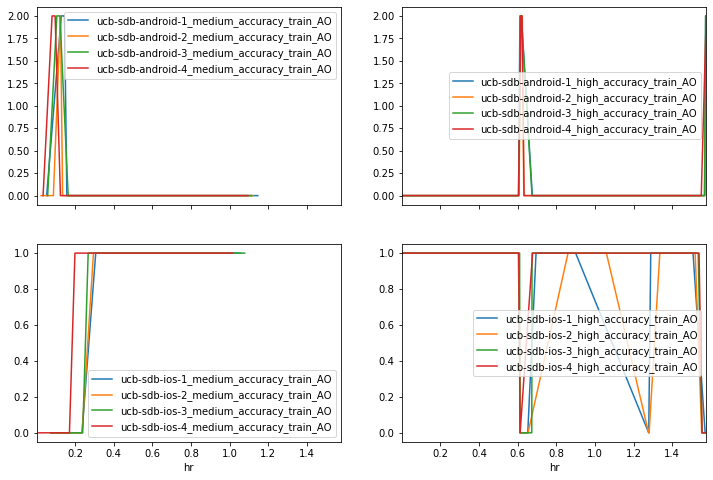

In [30]:
(ifig, ax) = plt.subplots(nrows=2, ncols=2, figsize=(12,8), sharex=True)
ezpv.display_unprocessed_android_activity_transitions(pvmco1, ax[0][0], "calibration", "medium")
ezpv.display_unprocessed_android_activity_transitions(pvmco1, ax[0][1], "calibration", "high")
ezpv.display_unprocessed_ios_activity_transitions(pvmco1, ax[1][0], "calibration", "medium")
ezpv.display_unprocessed_ios_activity_transitions(pvmco1, ax[1][1], "calibration", "high")
plt.legend()